# Reconstructing the Antarctica NWFZ

Article 6 of [Antarctic Treaty](https://treaties.unoda.org/t/antarctic) says:

> The provisions of the present Treaty shall apply to the area south of 60o South Latitude, including all ice shelves, but nothing in the present Treaty shall prejudice or in any way affect the rights, or the exercise of the rights, of any State under international law with regard to the high seas within that area.

For the purposes of the NWFZ, I'm going to ignore the high seas clause, following [this UNODA map](https://disarmament.unoda.org/wmd/nuclear/nwfz/).


In [1]:
import pandas as pd
import geopandas as gp
import shapely as shp

world_admin0_raw = gp.read_file("./tmp/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")

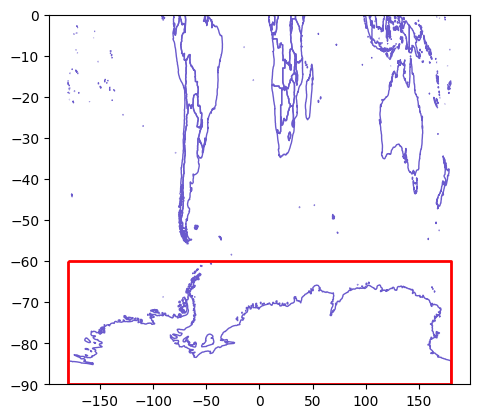

In [2]:
# Build treaty extent geometry 
treaty_geo = shp.geometry.Polygon([
    (-180,-60),
    (180,-60),
    (180,-90),
    (-180,-90)
]).segmentize(max_segment_length=1)


treaty_extent = gp.GeoDataFrame(
    data={
        "geometry": [
          treaty_geo
        ]
    },
    geometry="geometry",
    crs="EPSG:4326",
)


ax = world_admin0_raw.plot(color="none", edgecolor="slateblue")
ax.set_ylim(-90, 0)
treaty_extent.plot(ax=ax, color="none", edgecolor="red", lw=2)
treaty_extent.to_file("./tmp/antarctica-extent.geojson")